In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import hashlib

sns.set()

In [2]:
from utils.preprocessing import read_excel_sheets
table_names, tables = read_excel_sheets('./data/data.xls')

In [426]:
df = tables[table_names[0]][:115].copy()
df['Surname/Name'] = df['Surname/Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
df.head()

,Surname/Name,Date of birth,Num amb,Localisation Prim Tum,localisat group,Med Rec,Age at operation,Age group,date of operat,Angiography,...,AST be,bil be,prot be,gluc be,creat be,L be,er be,Hb be,tr be,ФВЛЖ
0,16cd53d75d67b00a89089bb65ce9c8e91dc04a50f4184b...,1947-10-26 00:00:00,616723,С18.7,2,3755-17,69.0,NaN,2017-03-14 00:00:00,0,...,30.0,9.8,66.0,4.50,54.0,6.20,4.20,124.0,283.0,65.0
1,ed0762773c975a396e83206f7452803681bfebde747e76...,1965-01-01 00:00:00,588225,С20,3,5282-17,52.0,NaN,2017-04-05 00:00:00,0,...,36.0,12.7,81.0,5.07,69.7,4.91,4.64,145.0,381.0,64.0
2,8094e625d1cb1e12bbeda62ca8010e829ef0be389992e8...,1940-01-07 00:00:00,218078,С20.1,3,14819-13,73.0,NaN,2013-10-09 00:00:00,ангиогр 22.05.14,...,60.0,17.0,70.0,6.00,70.0,6.88,4.17,113.0,233.0,66.0
3,1871490d5f50cd1adaf5e269be2fb19fead053f1fa19cf...,1951-06-15 00:00:00,211043,С18.2,1,15740-13,62.0,NaN,2013-10-21 00:00:00,CT-AG,...,27.0,6.4,71.0,4.37,61.2,5.35,3.75,112.0,183.0,53.0
4,712619e3d6ad90b4a9e467d89fd9a0f1360dec6e650be5...,1935-12-15 00:00:00,229216,С20.3,3,16884-13,77.0,NaN,2013-10-28 00:00:00,ХЭПА(Doxo),...,13.0,14.3,75.0,NaN,70.8,6.47,4.45,134.0,236.0,58.0


In [435]:
# оставим только 101 пациента, так как для 14 не сможем отследить появление метастазов в течение года
df = df[df['Outcome']!=3]
df['кров более 1 л'].fillna(0, inplace=True)

to_drop_cols = ['S hepar', 'S mts', 'Shep/mts']
df.drop(columns=to_drop_cols, inplace=True)

# CEA before : 49 null
# CEA dinam : 74 null

In [436]:
categorical_raw = tables[table_names[-1]]
quant_raw = tables[table_names[1]]

# categorical 

In [437]:
cat_df = categorical_raw[:115].copy()
cat_df = cat_df[cat_df['Outcome']!=3]
cat_df['Surname/Name'] = cat_df['Surname/Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

In [438]:
cat_df.head(5)

,Surname/Name,Localisation Prim Tum,localisat group,Angiography,CT-AG/AG,PV-embol,ХЭПА,Intraop US,RFA intraop,RFA before,...,C10,C12,C13,14,16,17,18,19,adjuv ther after,cure after
0,16cd53d75d67b00a89089bb65ce9c8e91dc04a50f4184b...,С18.7,2,0,0,0,0,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,ed0762773c975a396e83206f7452803681bfebde747e76...,С20,3,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,8094e625d1cb1e12bbeda62ca8010e829ef0be389992e8...,С20.1,3,ангиогр 22.05.14,2,0,0,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,1871490d5f50cd1adaf5e269be2fb19fead053f1fa19cf...,С18.2,1,CT-AG,1,0,0,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,712619e3d6ad90b4a9e467d89fd9a0f1360dec6e650be5...,С20.3,3,ХЭПА(Doxo),0,0,1,1,2,2,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"Ффур, ирино метрон, капецит, см"


# quantitative

In [447]:
quant_df= quant_raw[:115].copy()
quant_df['Surname/Name'] = quant_df['Surname/Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
quant_df = quant_df.iloc[(cat_df['Outcome']!=3).index]

In [448]:
quant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 114
Data columns (total 88 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Surname/Name          101 non-null    object 
 1   №№                    101 non-null    float64
 2   Med Rec               101 non-null    object 
 3   Age at operation      101 non-null    float64
 4   number of segments    101 non-null    float64
 5   Sex                   101 non-null    object 
 6   how many LN examined  101 non-null    float64
 7   how many positive     101 non-null    float64
 8   Chemo lines           101 non-null    float64
 9   CEA before            61 non-null     float64
 10  summ size of all mts  101 non-null    float64
 11  Number mts            101 non-null    float64
 12  blood loss, ml        101 non-null    float64
 13  mts max size, mm      101 non-null    float64
 14  Рост                  101 non-null    float64
 15  Вес                   1

# other

In [449]:
q_set = set(quant_raw.columns)
c_set = set(cat_df.columns)
all_set = set(df.columns)

In [450]:
print('Пересечений столбцов исходной талицы и таблицы с категориальными: ', len(all_set&c_set), ", всего последних:", len(c_set), " - ", list(all_set&c_set))
print('Пересечений столбцов исходной талицы и таблицы с количественными: ', len(all_set&q_set), ", всего последних:", len(q_set), " - ", list(all_set&q_set))

Пересечений столбцов исходной талицы и таблицы с категориальными:  47 , всего последних: 47  -  ['time after RFA', 'PV-embol', 'aft\\befor\\sinch', 'Operat volume', 14, 'vessel invasion', 16, 17, 'обширн/необширн', 18, 19, 'hepar operat', 'complic y/n0', 'Surname/Name', 'cure after', 'Angiography', 'C10', 'Left/Right lobe', 'prim op plan or emerg', 'localisat group', 'Hepatic pathology', 'Com1', 'C12', 'adjuv ther after', 'second cancer', 'C13', 'RFA intraop', 'simult oper', 'CT-AG/AG', 'Chemo regim before oper', 'Outcome', 'C3', 'I/o US new mts', 'ХЭПА', 'RFA before', 'C7', 'C6', 'Localisation Prim Tum', 'C9', 'I/o US vessels', 'Intraop US', 'CH/T regiment', 'Target ther', 'C8', 'tipe of CH( adjuv or curative)', 'simult. Y/N', 'C2']
Пересечений столбцов исходной талицы и таблицы с количественными:  87 , всего последних: 88  -  ['album d0', 'blood loss, ml', 'MNO1', 'fibrin d0', 'Ca d0', 'Creat d0', 'prot d0', 'gluc6', 'PTV d0', 'bilir 1', 'how many positive', 'ALT be', 'amyl 1', 'K1',

In [451]:
what_columns = list(all_set-q_set-c_set)
print('Не вошедшие в подтаблицы по категор/количеств. признаки: всего их ', len(what_columns), "-", what_columns)

Не вошедшие в подтаблицы по категор/количеств. признаки: всего их  84 - ['date of operat', 'anat\\atip\\mix\\split', 'ср ПС', 'V resect hepar, sm2', 'пат АД', 'удален подпеч дрен', 'перитонит', 'MNO', 'Long of oper min', 'кров более 1 л', 'Date of birth', 'AST-v', 'Unnamed: 179', 'Pringl method', 'Time till pgs', 'спайки', 'V mts, cm2', 'bilirub-v', 'интраоп особенности', 'discharge, day', 'Lobe(l-1,r-2)', 'гемотр ЭР', 'Response ChTh', 'Necros/distr mts', 'Complicat', 'Hepat or Sist Pgs', 'ТЭЛА', 'риск опер', 'гемотр СЗП', 'hylar L/N', 'желчеистечение', 'fever start', 'vessel plast', 'Month till mts', 'Genetic', 'TrD6/D0', 'мех желт', 'ALT D0/6', 'посев', 'Subcaps/Intrapar', 'печ недостат.1', 'N', 'Dif with imagine', 'Age group', 'А\\б', 'CEA dinam', 'абсцесс бр пол', 'А/б', 'Parench dissect', 'complications', 'ALT-v', 'кровотеч', 'плеврит', 'срАД', 'caps invasion', 'Diabetis', 'сост ASA', 'Hb v', 'ВМП/ОМС', 'PET/CT/MRI', 'T', 'fever long', 'Where Pgs?Organ', 'НОП = 706,2 х ППТ + 2,4',

In [452]:
df[what_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 114
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date of operat           101 non-null    object 
 1   anat\atip\mix\split      101 non-null    float64
 2   ср ПС                    100 non-null    object 
 3   V resect hepar, sm2      6 non-null      object 
 4   пат АД                   100 non-null    object 
 5   удален подпеч дрен       95 non-null     object 
 6   перитонит                101 non-null    float64
 7   MNO                      97 non-null     float64
 8   Long of oper min         101 non-null    object 
 9   кров более 1 л           101 non-null    float64
 10  Date of birth            101 non-null    object 
 11  AST-v                    101 non-null    object 
 12  Unnamed: 179             18 non-null     object 
 13  Pringl method            101 non-null    object 
 14  Time till pgs            1

In [453]:
df['TrD6/D0']

0      1.542308
1      1.386364
2      0.087314
3      0.039107
4      0.027183
         ...   
110    1.320856
111    0.994898
112    0.794979
113    0.795053
114    1.458333
Name: TrD6/D0, Length: 101, dtype: float64

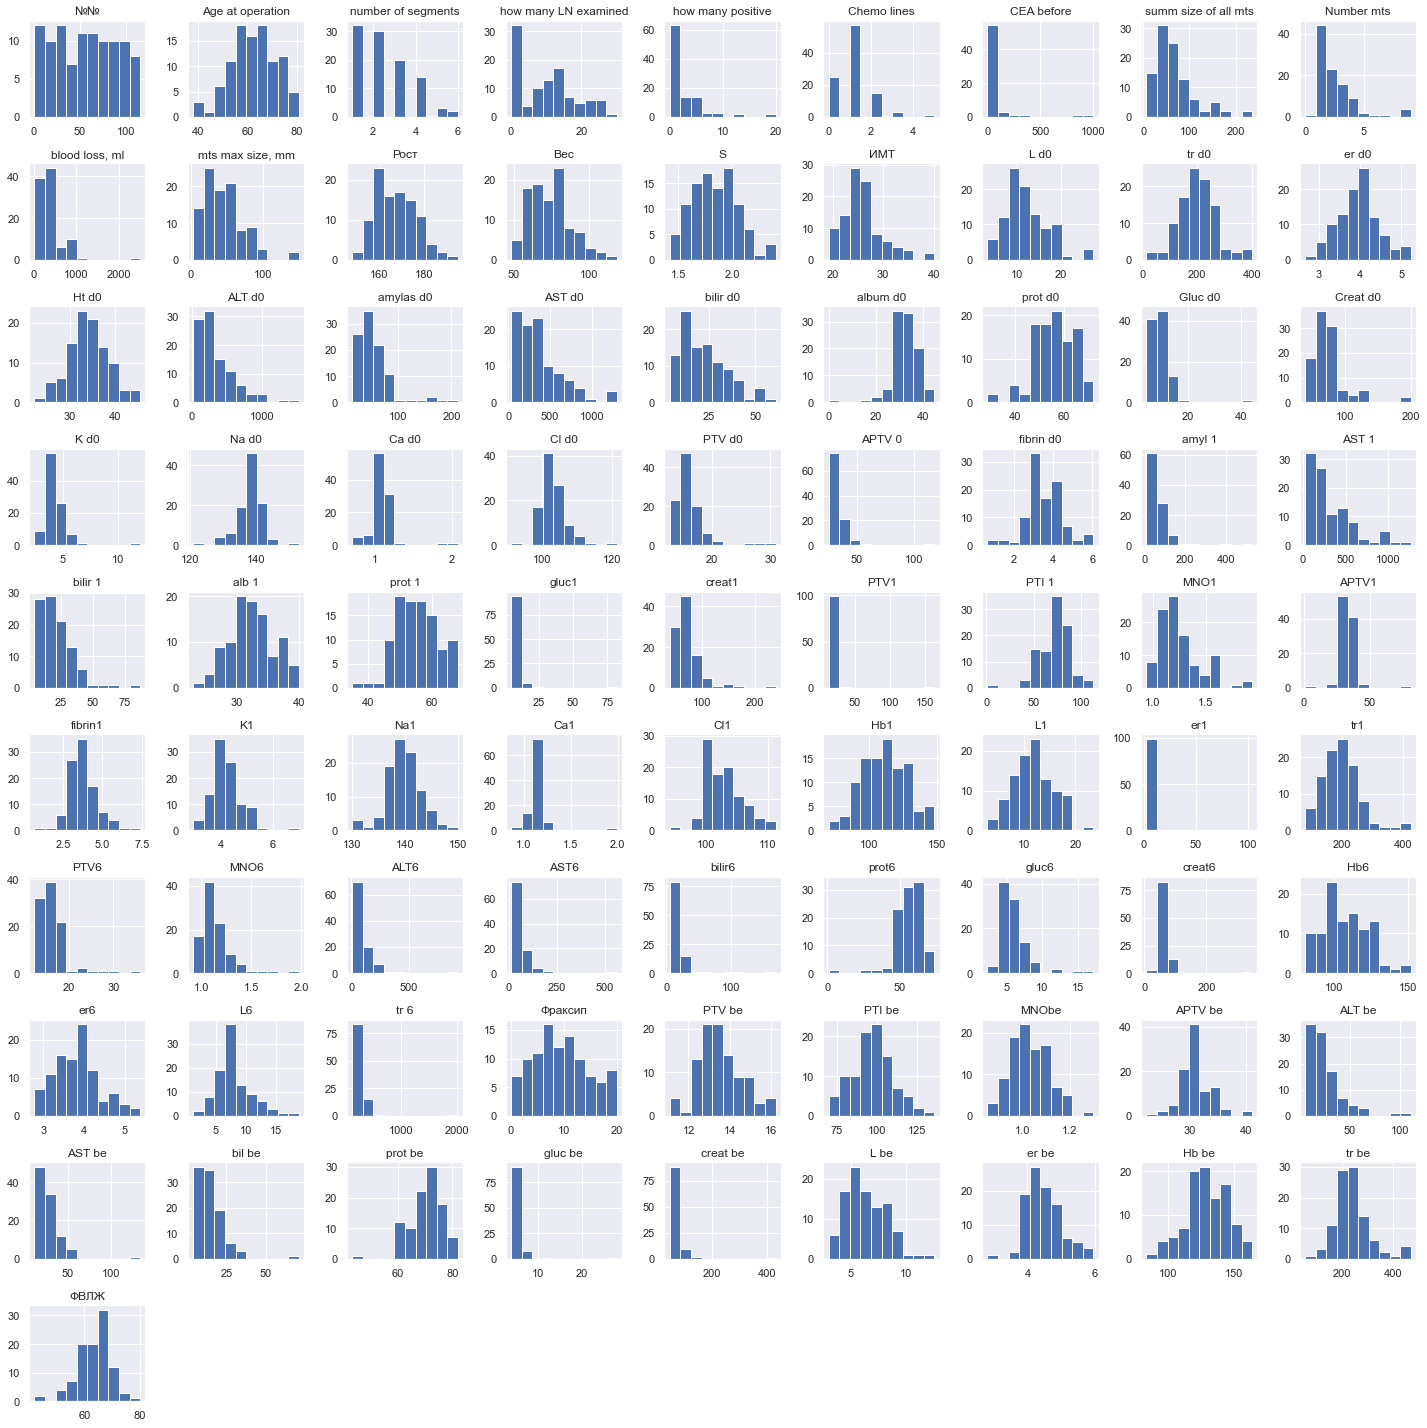

In [454]:
plt.rcParams["figure.figsize"] = (20,20)

quant_df.hist()
plt.tight_layout()

In [456]:
# df_num = df.loc[:, df.dtypes==float]
# corr = np.abs(df_num.corr())
corr = np.abs(df.corr())

<AxesSubplot:>

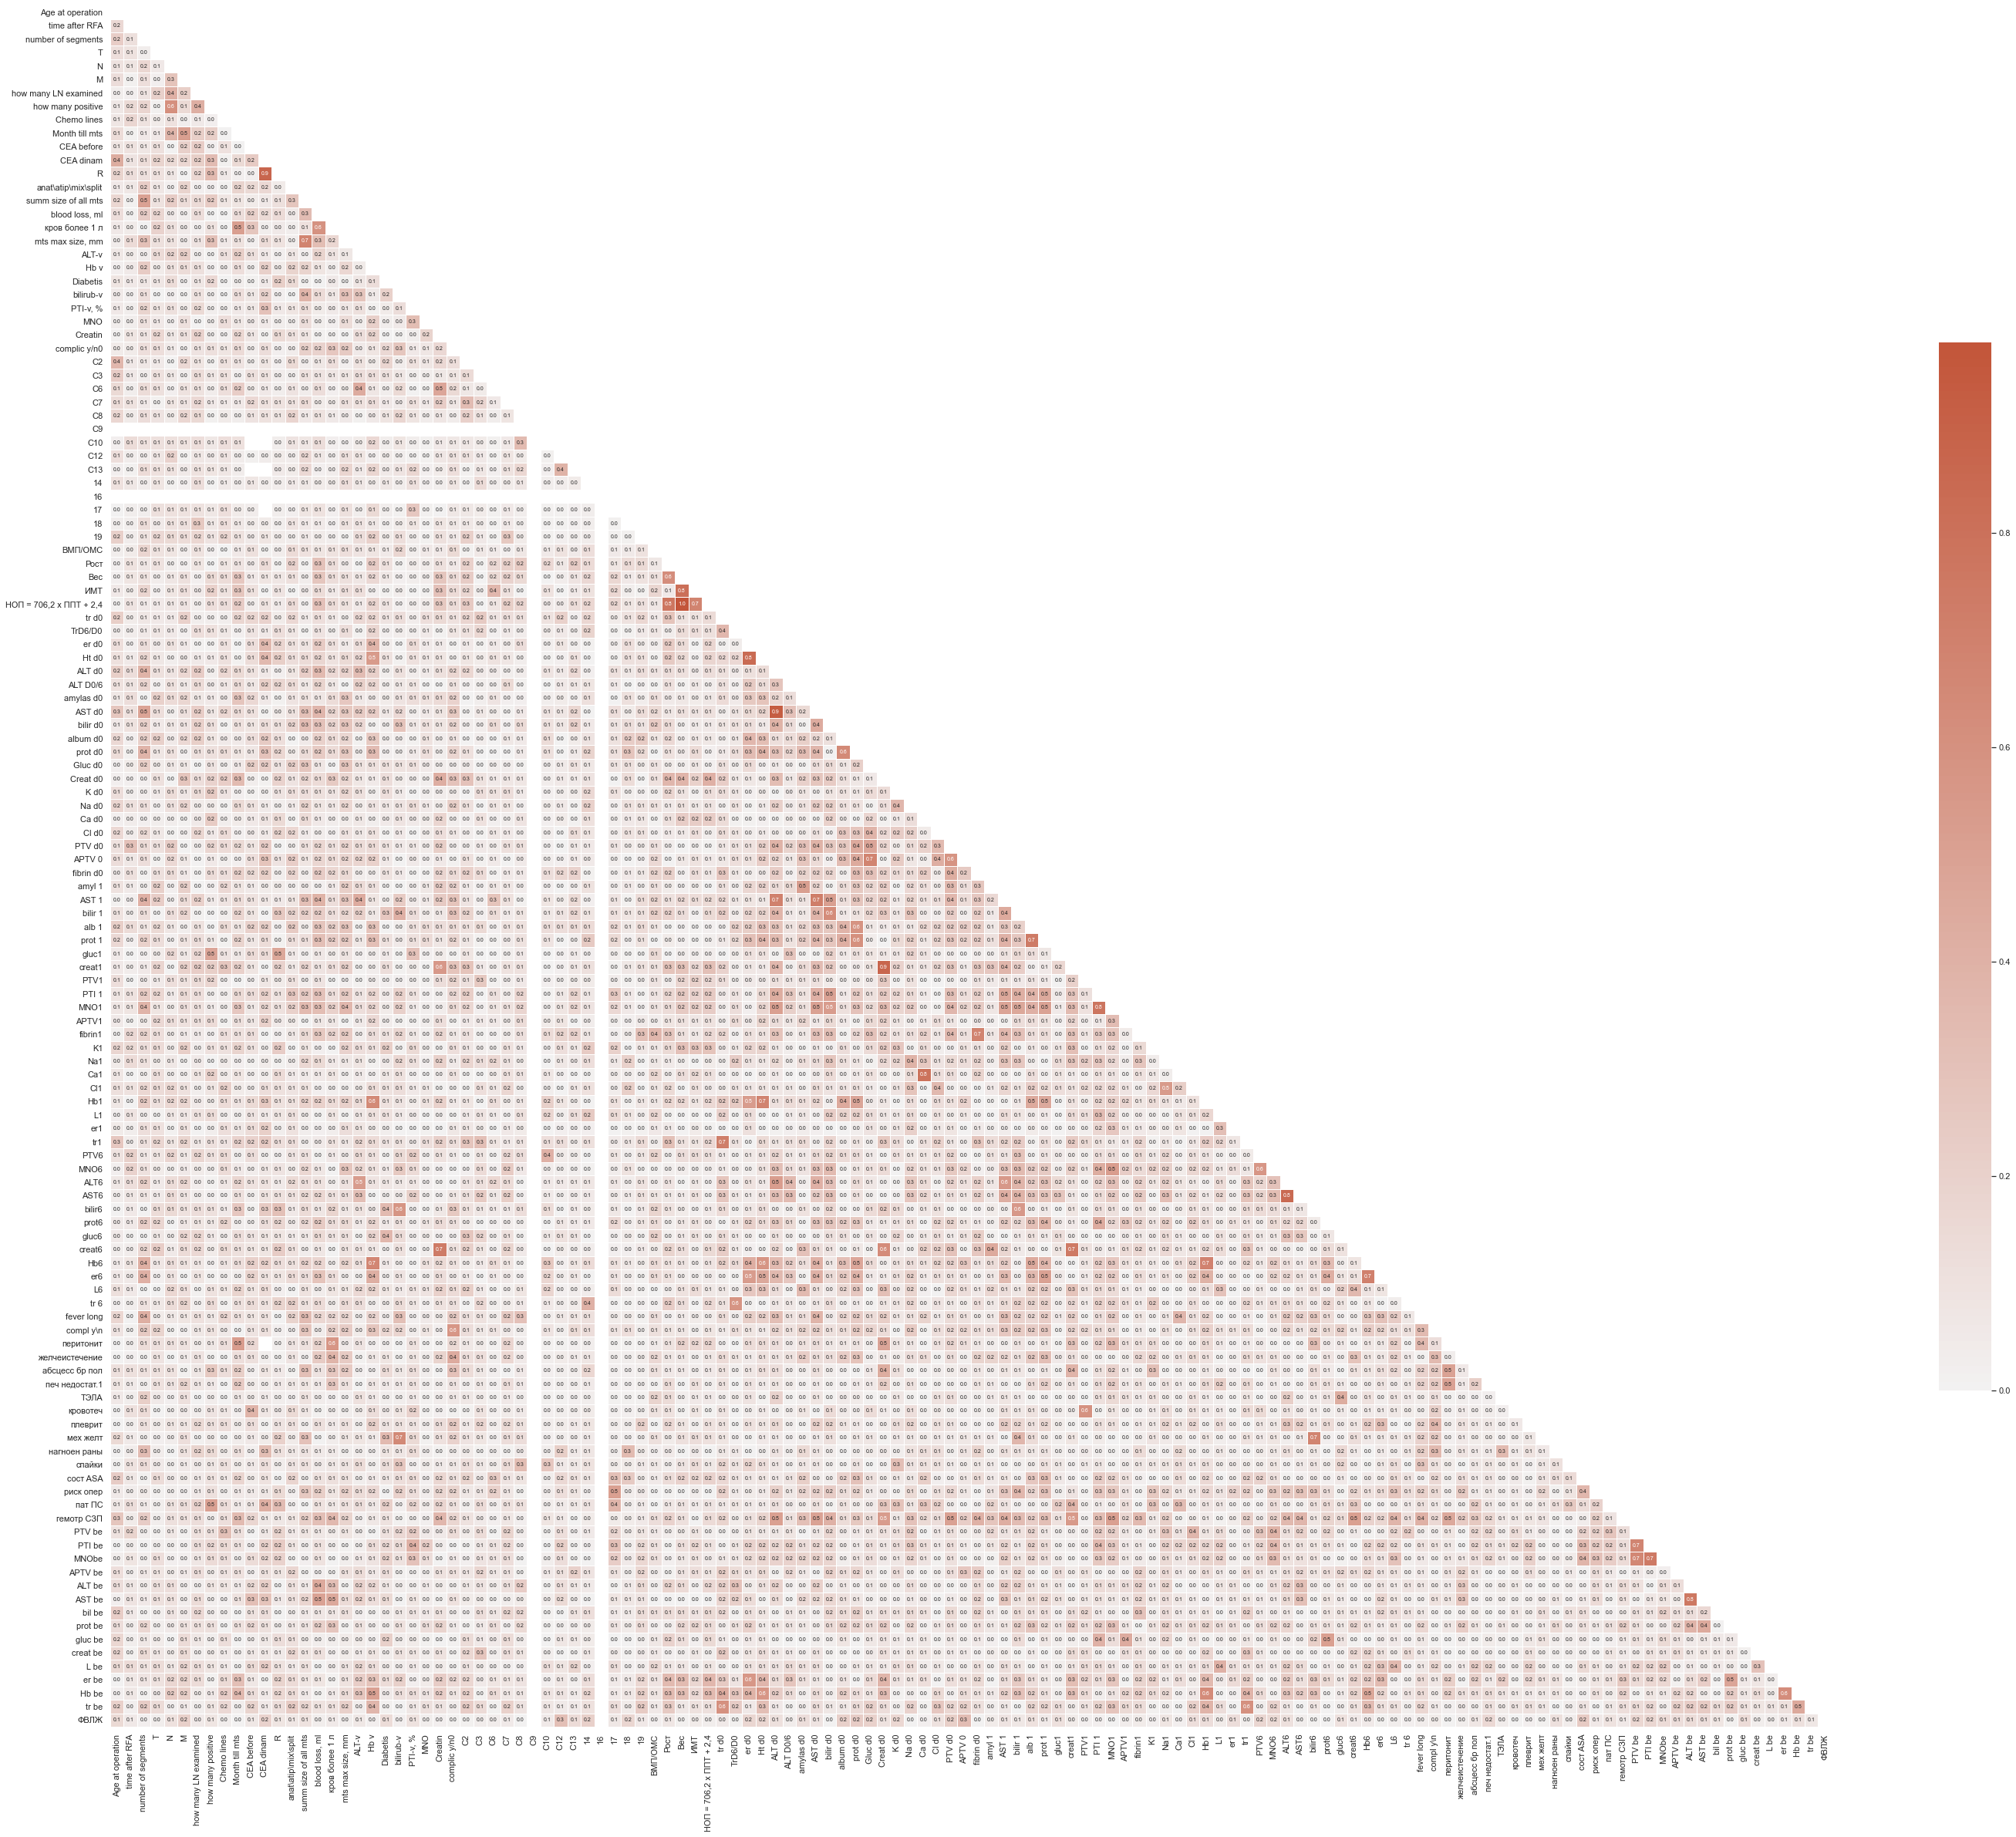

In [457]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            annot=True, fmt=".1f", annot_kws={"fontsize":7},
            # vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}
            )


In [110]:
# df.corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [458]:
corr_g05 = corr[corr>=0.5]
{k1: {k:v for k,v in v1.items() if pd.notnull(v) and v!=1} for k1, v1 in corr_g05.to_dict().items()}

{'Age at operation': {},
 'time after RFA': {},
 'number of segments': {'summ size of all mts': 0.5029442318822066},
 'T': {},
 'N': {'how many positive': 0.6051202392240939},
 'M': {'Month till mts': 0.5165507769105524},
 'how many LN examined': {},
 'how many positive': {'N': 0.6051202392240939, 'пат ПС': 0.5025488065317412},
 'Chemo lines': {},
 'Month till mts': {'M': 0.5165507769105524,
  'кров более 1 л': 0.5136796664294495,
  'перитонит': 0.525584658860166},
 'CEA before': {},
 'CEA dinam': {'R': 0.867941749378647},
 'R': {'CEA dinam': 0.867941749378647},
 'anat\\atip\\mix\\split': {},
 'summ size of all mts': {'number of segments': 0.5029442318822066,
  'mts max size, mm': 0.6848646807999598},
 'blood loss, ml': {'кров более 1 л': 0.5884936349852641},
 'кров более 1 л': {'Month till mts': 0.5136796664294495,
  'blood loss, ml': 0.5884936349852641,
  'перитонит': 0.5715476066494083},
 'mts max size, mm': {'summ size of all mts': 0.6848646807999598},
 'ALT-v': {'ALT6': 0.53304000

In [459]:
corr_columns = np.abs(df.corr()['compl y\\n'].sort_values())
corr_columns[corr_columns>=0.3]


fever long        0.338915
желчеистечение    0.347620
нагноен раны      0.347620
плеврит           0.370705
complic y/n0      0.570962
compl y\n         1.000000
Name: compl y\n, dtype: float64

In [460]:
# Послеоперационные признаки
tests_v = [
    'MNO', 'hipoprot', 'Hb v', 'PTI-v, %', 'ALT-v', 'bilirub-v', 
    'AST-v', 'Creatin'
]
# Сразу после операции
tests_d0 = [
    'L d0', 'tr d0', 'er d0', 'Ht d0', 'ALT d0', 'amylas d0',
    'AST d0', 'bilir d0', 'album d0', 'prot d0', 'Gluc d0',
    'Creat d0', 'K d0', 'Na d0', 'Ca d0', 'Cl d0', 'PTV d0',
    'PTI d0', 'APTV 0', 'fibrin d0', 'Hb d0'
]

# Первый день после операции
tests_d1 = [
    'ALT d1', 'amyl 1', 'AST 1', 'bilir 1', 'alb 1',
    'prot 1', 'gluc1', 'creat1', 'PTV1', 'PTI 1', 'MNO1',
    'APTV1', 'fibrin1', 'K1', 'Na1', 'Ca1', 'Cl1', 'Hb1',
    'L1', 'er1', 'tr1'
]

# # Шестой день после операции
tests_d6 = [
    'PTV6', 'PTI6', 'MNO6', 'ALT6', 'AST6', 'bilir6', 'prot6',
    'gluc6', 'creat6', 'Hb6', 'er6', 'L6', 'tr 6'
]

# # Какой-то день после операции
tests_be = [
    'PTV be', 'PTI be', 'MNObe', 'APTV be', 'ALT be', 'AST be',
    'bil be', 'prot be', 'gluc be', 'creat be', 'L be', 'er be',
    'Hb be', 'tr be', 'ФВЛЖ'
]

all_tests = {
    'v': tests_v,
    'd0': tests_d0,
    'd1': tests_d1, 
    'd6': tests_d6,
    'be': tests_be
}

In [461]:
test_columns = set()
for test in all_tests.items():
    t = test[1]
    # t.sort()
    for i in t:
        test_columns.add(i)


In [463]:
common_tests = {
    'ALT': ['ALT-v', 'ALT d0', 'ALT d1', 'ALT6', 'ALT be'],
    'APTV': ['APTV1', 'APTV 0', '', '', 'APTV be'],
    'AST': ['AST-v', 'AST d0', 'AST 1', 'AST6', 'AST be'],
    'Ca': ['', 'Ca d0', 'Ca1', '', ''],
    'Cl': ['', 'Cl d0', 'Cl1', '', ''],
    'Creatin': ['Creatin', 'Creat d0', 'creat1', 'creat6', 'creat be'],
    'Hb': ['Hb v', 'Hb d0', 'Hb1', 'Hb6', 'Hb be'],
    'K': ['', 'K d0', 'K1', '', ''],
    'L': ['', 'L d0', 'L1', 'L6', 'L be'],
    'MNO': ['MNO', '', 'MNO1', 'MNO6', 'MNObe'],
    'Na': ['', 'Na d0', 'Na1', '', ''],
    'PTI': ['PTI-v, %', 'PTI d0', 'PTI 1', 'PTI6', 'PTI be'],
    'PTV': ['', 'PTV1', 'PTV d0', 'PTV6', 'PTV be'],
    'alb': ['',  'album d0', 'alb 1', '', ''],
    'amyl': ['', 'amylas d0', 'amyl 1', '', ''],
    'bil': ['bilirub-v', 'bilir d0', 'bilir 1', 'bilir6', 'bil be'],
    'er': ['', 'er d0', 'er1', 'er6', 'er be'],
    'fibrin': ['', 'fibrin d0', 'fibrin1', '', ''],
    'gluc': ['', 'Gluc d0', 'gluc1', 'gluc6', 'gluc be'],
    'prot': ['', 'prot d0', 'prot 1', 'prot6', 'prot be'],
    'tr': ['', 'tr d0', 'tr1', 'tr 6', 'tr be']
}

# Может быть и для мочи, и для крови:
#   gluc : концентрация глюкозы,  
#   L : лейкоциты (?)
#   er : эритроциты (?)
#   Hb : hemoglobin (?)
#   tr : тромбоциты (?)
#   bil : билирубин
#   Na : sodium
#   prot: протеин, 
#   Ca : Urinary calcium
#   Cl : ?


# Общий анализ мочи: 
#   K : potassium
#   Creatin : Creatinine


# Общий анализ крови:
#   alb: Albumin
#   ALT: АЛТ (аланинаминотрансфераза)
#   AST: АСТ (аспартатаминотрансфераза)
#   amyl: Amylase Амилаза
#   fibrin: Фибриноген

# Анализ венозной крови:
# MNO - МНО (международное нормализованное отношение) — 
#       расчетная величина, характеризующая отношение 
#       протромбинового времени и протромбинового индекса.
# PTV - Протромбиновое время (ПТВ) — это время в секундах, 
#       за которое образуется кровяной сгусток, то есть тромб. 
#       - Увеличение ПТВ может быть связано с кровотечениями, 
#         а его сокращение повышает риск тромбозов.
# PTI - Протромбиновый индекс (ПТИ) — значение, равное 
#       отношению ПТВ контрольного образца к ПТВ исследуемого, 
#       выражается в процентах
# APTV - АЧТВ — активированное частичное тромбопластиновое время — 
#       тест для оценки состояния свертывающей системы крови.
#       1. Удлинение АЧТВ у взрослых и детей говорит о гипокоагуляции — 
#       снижении способности к образованию тромбов. Это увеличивает 
#       риск развития кровотечений.
#       2. Укорочение активированного частичного тромбопластинового 
#       времени отражает преобладание гиперкоагуляции — повышенной 
#       свертываемости крови. 

# TrD6/D0

urine_tests = [
    'gluc', 'prot', 'L', 'er', 'bil', 'Na', 'K', 'Ca',
    'Hb', 'Creatin', 
]
# test_columns

In [464]:
# Почистим немного данные перед рисованием графиков
df['PTI d0'].replace(' ', 0, inplace=True)


tests_df = df[test_columns]
tests_obj_cols = tests_df.select_dtypes(object).columns
# for col in tests_obj_cols:
#     cls = dict(tests_df[col].apply(lambda x: type(x)))
#     for val in cls:
#         if 'int' not in str(cls[val]):
#             print(str(val) + str(cls[val]), end='  \n')
# Получилось, что в этих колонках вперемешку int и float => переведем в float
df.loc[:, test_columns] = df[test_columns].astype(float)
df[test_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 114
Data columns (total 78 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   album d0   101 non-null    float64
 1   Ca d0      101 non-null    float64
 2   MNO1       100 non-null    float64
 3   fibrin d0  101 non-null    float64
 4   Creat d0   101 non-null    float64
 5   MNO        97 non-null     float64
 6   prot d0    101 non-null    float64
 7   gluc6      100 non-null    float64
 8   PTV d0     101 non-null    float64
 9   bilir 1    101 non-null    float64
 10  AST-v      101 non-null    float64
 11  ALT be     100 non-null    float64
 12  amyl 1     100 non-null    float64
 13  K1         100 non-null    float64
 14  bilirub-v  101 non-null    float64
 15  tr d0      101 non-null    float64
 16  Hb6        100 non-null    float64
 17  PTI be     99 non-null     float64
 18  PTV be     99 non-null     float64
 19  PTV6       100 non-null    float64
 20  L6        

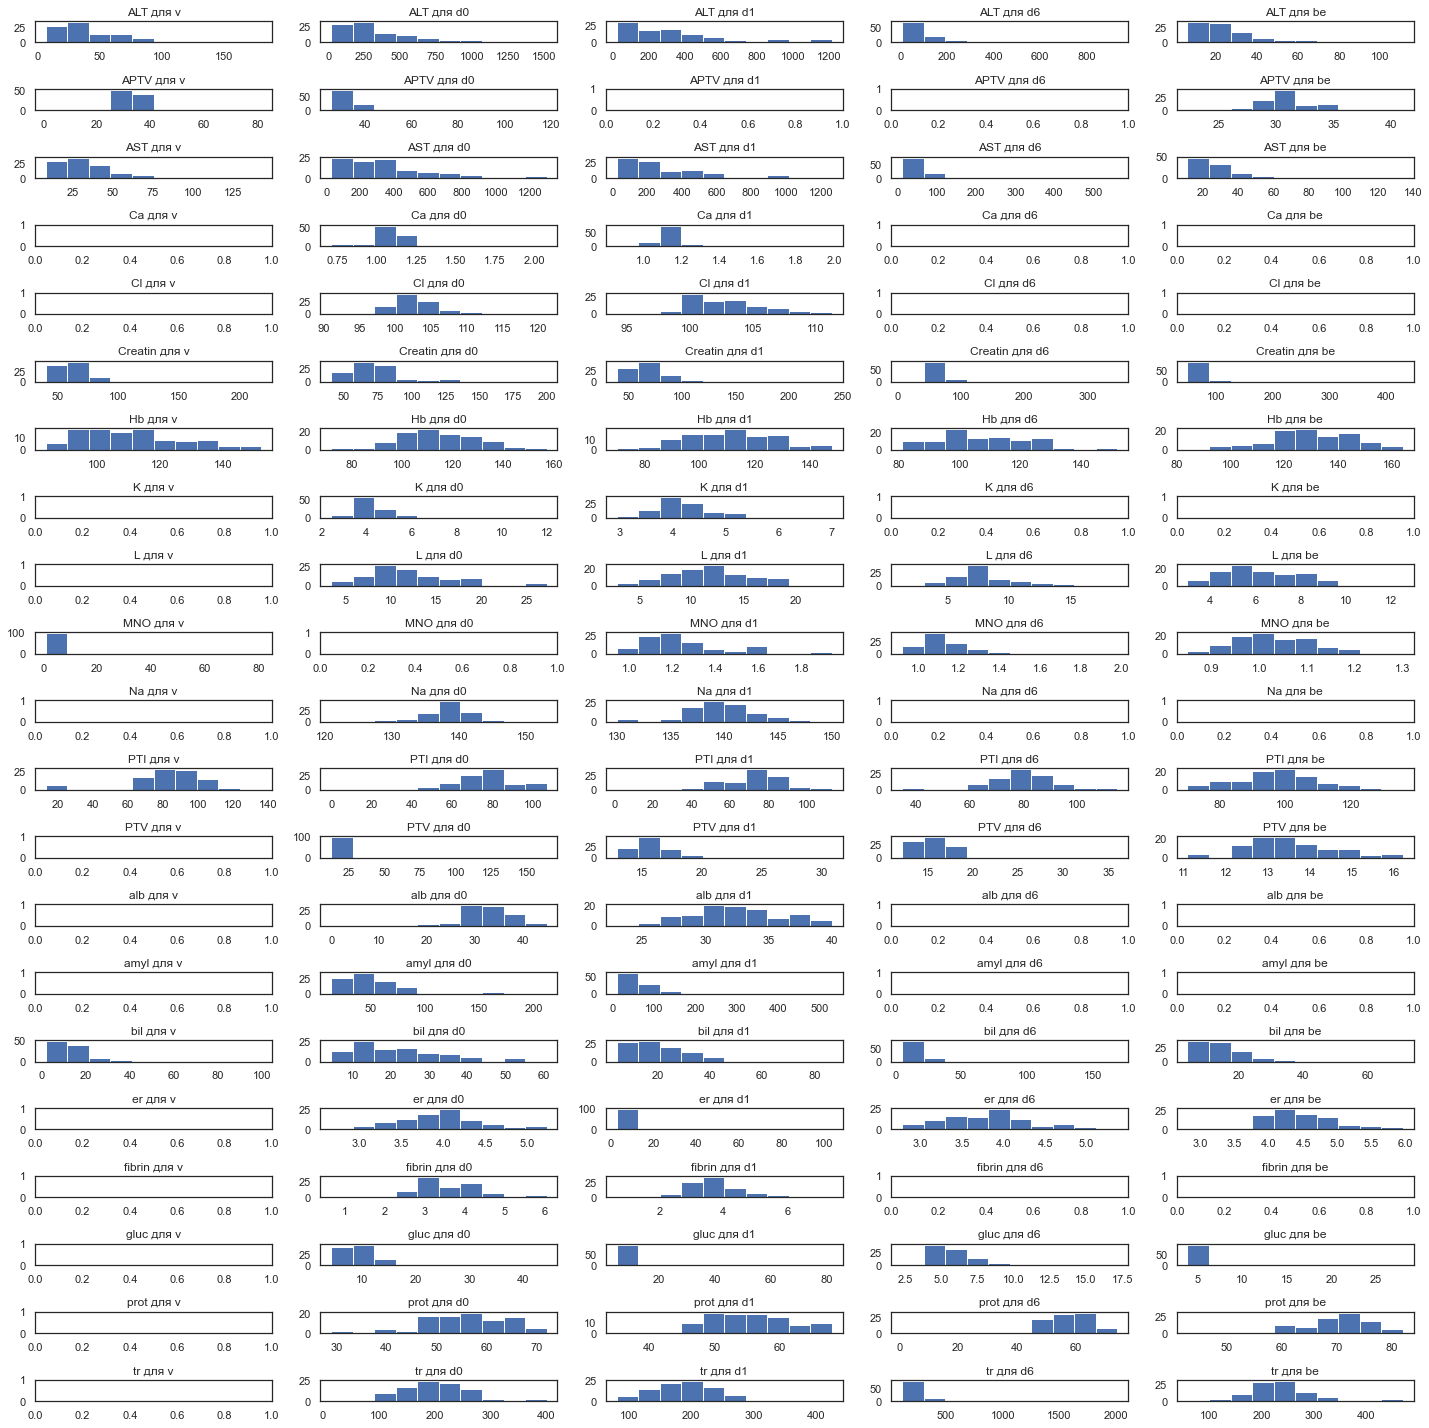

In [465]:
# графики распределения результатов анализа (ось игрек) для разных дней (ось икс)
fig, axes = plt.subplots(nrows=len(common_tests), ncols=len(all_tests))
sns.set_theme(style='darkgrid')

n = 1
for i, ax in enumerate(axes.flat):
    test = list(common_tests.keys())[int(i / len(all_tests))]
    day = int(i%len(all_tests))
    ax.set(title= test + ' для ' + list(all_tests.keys())[day]) # , xticks=[], yticks=[]
    if common_tests[test][day] != '':
        ax.hist(df[common_tests[test][day]].astype(float))
    
    n += 1


plt.tight_layout()
plt.show()


# Base model with all numerical features 

In [466]:
data = df.drop(columns=['CEA before', 'CEA dinam'])
# CEA before : 49
# CEA dinam : 74

In [467]:
df_num = data[data.corr().columns]

In [468]:
df_num['compl y\\n'].value_counts()

0.0    59
1.0    42
Name: compl y\n, dtype: int64

In [469]:
for i in df_num.columns:
    print(i, ':', df_num[i].isnull().sum())

Age at operation : 0
time after RFA : 0
number of segments : 0
T : 0
N : 0
M : 0
how many LN examined : 0
how many positive : 0
Chemo lines : 0
Month till mts : 0
R : 0
anat\atip\mix\split : 0
summ size of all mts : 0
blood loss, ml : 0
кров более 1 л : 0
mts max size, mm : 0
AST-v : 0
ALT-v : 0
Hb v : 0
Diabetis : 0
bilirub-v : 0
PTI-v, % : 4
MNO : 4
Creatin : 0
hipoprot : 1
complic y/n0 : 0
C2 : 0
C3 : 0
C6 : 0
C7 : 0
C8 : 0
C9 : 0
C10 : 0
C12 : 0
C13 : 0
14 : 0
16 : 0
17 : 0
18 : 0
19 : 0
ВМП/ОМС : 1
Рост : 0
Вес : 0
ИМТ : 0
НОП = 706,2 х ППТ + 2,4 : 0
Hb d0 : 0
L d0 : 0
tr d0 : 0
TrD6/D0 : 0
er d0 : 0
Ht d0 : 0
ALT d0 : 0
ALT D0/6 : 0
amylas d0 : 0
AST d0 : 0
bilir d0 : 0
album d0 : 0
prot d0 : 0
Gluc d0 : 0
Creat d0 : 0
K d0 : 0
Na d0 : 0
Ca d0 : 0
Cl d0 : 0
PTV d0 : 0
PTI d0 : 0
APTV 0 : 0
fibrin d0 : 0
ALT d1 : 0
amyl 1 : 1
AST 1 : 0
bilir 1 : 0
alb 1 : 0
prot 1 : 0
gluc1 : 0
creat1 : 0
PTV1 : 0
PTI 1 : 1
MNO1 : 1
APTV1 : 1
fibrin1 : 1
K1 : 1
Na1 : 3
Ca1 : 2
Cl1 : 3
Hb1 : 1
L1 :

In [470]:
# выкинем пока что строки с хотя бы одним пропущенным значением
print(df_num.isna().any(axis=1).sum())
df_num = df_num[~df_num.isna().any(axis=1)]
print(df_num.isna().any(axis=1).sum())

15
0


In [471]:
df_num.columns = np.array([str(x) for x in df_num.columns])

In [472]:
df[['complic y/n0', 'Complicat']].value_counts()

complic y/n0  Complicat
0.0           0            70
1.0           3             7
              4             6
              11            4
              1             3
              2             3
              5             1
              6             1
              7             1
              8             1
              9             1
              10            1
              12            1
              15            1
dtype: int64

In [473]:
df[['compl y\\n', 'complications']].value_counts()

compl y\n  complications                         
0.0        0                                         58
1.0        4                                          8
           5                                          7
           2                                          5
           3                                          4
           13                                         2
           8                                          2
           abscedir. Pneumon, empiema pleur - 60      1
           21                                         1
           20                                         1
           19                                         1
           15                                         1
           14                                         1
           10                                         1
           12                                         1
           11                                         1
0.0        4                                          

In [474]:
df['compl y\\n'].value_counts()

0.0    59
1.0    42
Name: compl y\n, dtype: int64

In [475]:
df_num['compl y\\n'].value_counts()

0.0    52
1.0    34
Name: compl y\n, dtype: int64

In [414]:
# list(df_num.columns)

In [485]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    df_num.drop(columns=['compl y\\n']), 
    df_num['compl y\\n'],
    stratify=(df_num['compl y\\n']==1).astype(int),
    test_size=0.3, 
    random_state=42)


Используя только факторы из шкалы Вонга:

по результатам - только их явно недостаточно, чтобы спрогнозировать с хорошей точностью исход.

In [534]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    df[factors].fillna(0), 
    df['compl y\\n'],
    stratify=(df['compl y\\n']==1).astype(int),
    test_size=0.3, 
    random_state=42)


In [535]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [536]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import cross_val_score

model = LogisticRegression(random_state=1) # max_iter=1000
model.fit(xtrain_scaled, ytrain)

ytrain_pred = model.predict(xtrain_scaled)
ytest_pred = model.predict(xtest_scaled)

print('Train:')
print(cm(ytrain, ytrain_pred))
print('Test:')
print(cm(ytest, ytest_pred))

print('Accuracy: ', model.score(xtest_scaled, ytest))

clf = LogisticRegression(random_state=42, penalty='l2') # max_iter=1000
print('Recall:', cross_val_score(
    clf, 
    xtrain_scaled, ytrain, 
    cv=7,
    scoring='recall'))


Train:
[[40  1]
 [26  3]]
Test:
[[18  0]
 [12  1]]
Accuracy:  0.6129032258064516
Recall: [0.2  0.   0.25 0.   0.   0.   0.25]


In [537]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1, max_depth=3, min_samples_split=5, max_features='sqrt')
model.fit(xtrain_scaled, ytrain)

ytrain_pred = model.predict(xtrain_scaled)
ytest_pred = model.predict(xtest_scaled)

print('Train:')
print(cm(ytrain, ytrain_pred))
print('Test:')
print(cm(ytest, ytest_pred))

print('Accuracy: ', model.score(xtest_scaled, ytest))

clf = RandomForestClassifier(random_state=1) # max_iter=1000
print('Recall:', cross_val_score(
    clf, 
    xtrain_scaled, ytrain, 
    cv=7,
    scoring='recall'))

Train:
[[41  0]
 [15 14]]
Test:
[[17  1]
 [ 7  6]]
Accuracy:  0.7419354838709677
Recall: [0.4  0.   0.25 0.   0.5  0.25 0.25]


# Шкала Фонга : Fong Clinical Risk Score

In [378]:
df.columns

Index([         'Surname/Name',         'Date of birth',
                     'Num amb', 'Localisation Prim Tum',
             'localisat group',              'Med Rec ',
            'Age at operation',             'Age group',
              'date of operat',           'Angiography',
       ...
                      'AST be',                'bil be',
                     'prot be',               'gluc be',
                    'creat be',                  'L be',
                       'er be',                 'Hb be',
                       'tr be',                  'ФВЛЖ'],
      dtype='object', length=217)

In [393]:
scale_score = ['риск опер']

'''Эти ли признаки?'''
factors = [
    'hylar L/N', # node-positive primary how many positive   hylar L/N
    'Month till mts', # Disease-free interval <12 months
    'Number mts', # >1 hepatic tumor 
    'CEA before', # Preoperative CEA level >200 ng/mL 
    'mts max size, mm' # Size of largest hepatic tumor >5cm
]

### 'CEA before'

count      66.000000
mean       60.270909
std       170.185096
min         0.100000
25%         2.700000
50%         9.760000
75%        35.750000
max      1000.000000
Name: CEA before, dtype: float64


<AxesSubplot:>

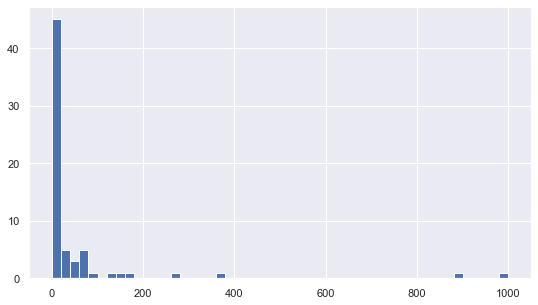

In [394]:
plt.rcParams["figure.figsize"] = (9,5)
print(df['CEA before'].describe())
df['CEA before'].hist(bins=50)

<AxesSubplot:>

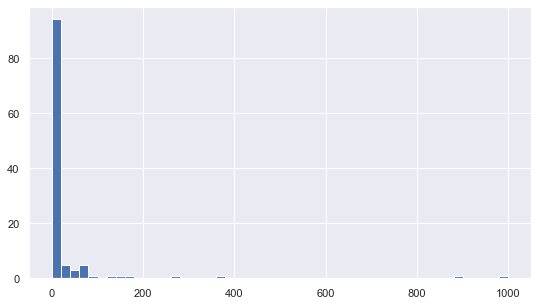

In [399]:
df['CEA before'].fillna(df['CEA before'].median()).hist(bins=50)

In [400]:
df['CEA before'].fillna(df['CEA before'].median(), inplace=True)

### calc_score

In [406]:
def calc_score(x, factors):
    # print(x[factors[0]], int(x[factors[0]]>0))
    # print(x[factors[1]], int(x[factors[1]]<12))
    # print(x[factors[2]], int(x[factors[2]]>1))
    # print(x[factors[3]], int(x[factors[3]]>200))
    # print(x[factors[4]], int(x[factors[4]]>50))

    return 1.0 * (
        int(x[factors[0]]>0) + 
        int(x[factors[1]]<12) + 
        int(x[factors[2]]>=1) + 
        int(x[factors[3]]>200) + 
        int(x[factors[4]]>=50)
    )

# CEA before - куча так-то нулей : 49

scales = pd.concat(
    [df[factors+scale_score],
    df[factors+scale_score].apply(lambda x: calc_score(x, factors), axis=1)],
    axis=1
)
scales.columns = factors+['their']+['mine']
noteq = scales[scales['their']!=scales['mine']]

In [407]:
noteq

,hylar L/N,Month till mts,Number mts,CEA before,"mts max size, mm",their,mine
0,0,0.0,2,1.09,35.0,3.0,2.0
1,0,16.0,3,7.20,53.0,4.0,2.0
2,0,5.0,2,164.50,40.0,4.0,2.0
4,0,12.0,3,47.91,40.0,3.0,1.0
5,0,0.0,1,1000.00,60.0,3.0,4.0
...,...,...,...,...,...,...,...
108,0,0.0,2,25.00,60.0,4.0,3.0
109,0,0.0,1,9.76,17.0,3.0,2.0
110,0,12.0,3,19.50,30.0,3.0,1.0
111,0,18.0,1,11.00,30.0,3.0,1.0


In [409]:
noteq.style.bar(['their', 'mine'])

,hylar L/N,Month till mts,Number mts,CEA before,"mts max size, mm",their,mine
0,0,0.000000,2,1.090000,35.000000,3.000000,2.000000
1,0,16.000000,3,7.200000,53.000000,4.000000,2.000000
2,0,5.000000,2,164.500000,40.000000,4.000000,2.000000
4,0,12.000000,3,47.910000,40.000000,3.000000,1.000000
5,0,0.000000,1,1000.000000,60.000000,3.000000,4.000000
7,0,0.000000,5,2.700000,40.000000,3.000000,2.000000
8,0,4.000000,4,85.000000,30.000000,3.000000,2.000000
9,0,11.000000,9,2.380000,23.000000,3.000000,2.000000
10,0,0.000000,4,3.060000,20.000000,3.000000,2.000000
13,0,17.000000,1,3.500000,25.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'their'}>,
        <AxesSubplot:title={'center':'mine'}>]], dtype=object)

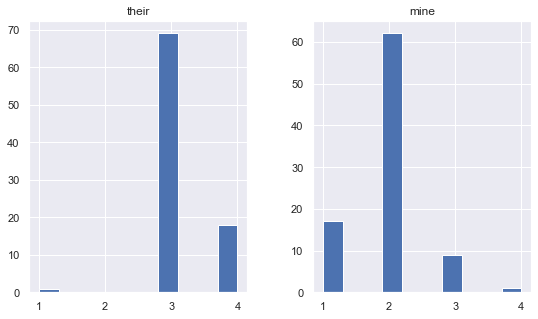

In [412]:
noteq[['their', 'mine']].hist()

In [410]:
ex = df.iloc[3]
print(calc_score(ex, factors), ex['риск опер'])

3.0 3.0


In [411]:
df[factors+scale_score]

,hylar L/N,Month till mts,Number mts,CEA before,"mts max size, mm",риск опер
0,0,0.0,2,1.09,35.0,3.0
1,0,16.0,3,7.20,53.0,4.0
2,0,5.0,2,164.50,40.0,4.0
3,0,4.0,2,1.70,50.0,3.0
4,0,12.0,3,47.91,40.0,3.0
...,...,...,...,...,...,...
110,0,12.0,3,19.50,30.0,3.0
111,0,18.0,1,11.00,30.0,3.0
112,0,6.0,3,15.20,80.0,3.0
113,0,3.0,2,9.76,60.0,3.0


In [254]:
# for i in df.columns:
#     print(i, df[i].value_counts(), end='\n\n')

# Вопросы

1. риск опер - всё же шкала Фонга или как? если да, то каким факторам какие столбцы соответствуют? потому что иначе у меня 80+процентов несовпадений с подсчитанным скором и значением в риск опер